In [7]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%autoreload 
import pandas as pd
import numpy as np
import h2o
from h2o.automl import H2OAutoML

Start h2o client

In [9]:
h2o.init(max_mem_size='10G')

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,22 secs
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_henrikraa_pclvz3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,9.50 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [28]:
h2o.cluster().shutdown()    

H2O session _sid_a15b closed.


In [10]:
data_path = '../data_feature_enigineering/df_selected_preprocessed_mean.csv'
save_path = '/home/henrikraa/models/'

### Load data


In [11]:
df = pd.read_csv(data_path)
df.head()

,date_forecast,direct_rad:W,sun_elevation:d,visibility:m,pressure_50m:hPa,relative_humidity_1000hPa:p,day_of_year,air_density_2m:kgm3,cloud_base_agl:m,ceiling_height_agl:m,...,sun_azimuth:d,wind_speed_v_10m:ms,day,wind_speed_10m:ms,total_cloud_cover:p,fresh_snow_24h:cm,fresh_snow_6h:cm,fresh_snow_1h:cm,building,pv_measurement
0,2019-06-02 22:00:00,0.00,-3.77425,40386.477,999.77500,71.674995,153,1.22825,1728.950,1728.950,...,348.03674,-0.500,2,3.600,100.000,0.0,0.0,0.0,0,0.00
1,2019-06-02 23:00:00,0.00,-4.35725,33770.650,998.65000,68.000000,153,1.22350,1689.825,1689.825,...,91.98075,0.275,2,3.350,100.000,0.0,0.0,0.0,0,0.00
2,2019-06-03 00:00:00,0.00,-3.30950,13595.500,997.97500,67.950000,154,1.21975,1563.225,1563.225,...,14.93475,0.750,3,3.050,100.000,0.0,0.0,0.0,0,0.00
3,2019-06-03 01:00:00,0.00,-0.82250,2321.850,997.44995,73.875000,154,1.21800,1283.425,1283.425,...,28.63025,0.875,3,2.725,100.000,0.0,0.0,0.0,0,0.00
4,2019-06-03 02:00:00,0.15,3.05125,11634.800,996.50000,79.925000,154,1.21800,1003.500,1003.500,...,41.99750,0.925,3,2.550,99.225,0.0,0.0,0.0,0,19.36


In [12]:
df_h2o = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [13]:
df_h2o

date_forecast,direct_rad:W,sun_elevation:d,visibility:m,pressure_50m:hPa,relative_humidity_1000hPa:p,day_of_year,air_density_2m:kgm3,cloud_base_agl:m,ceiling_height_agl:m,wind_speed_u_10m:ms,sun_azimuth:d,wind_speed_v_10m:ms,day,wind_speed_10m:ms,total_cloud_cover:p,fresh_snow_24h:cm,fresh_snow_6h:cm,fresh_snow_1h:cm,building,pv_measurement
2019-06-02 22:00:00,0,-3.77425,40386.5,999.775,71.675,153,1.22825,1728.95,1728.95,-3.575,348.037,-0.5,2,3.6,100,0,0,0,0,0
2019-06-02 23:00:00,0,-4.35725,33770.7,998.65,68,153,1.2235,1689.83,1689.83,-3.35,91.9808,0.275,2,3.35,100,0,0,0,0,0
2019-06-03 00:00:00,0,-3.3095,13595.5,997.975,67.95,154,1.21975,1563.22,1563.22,-2.95,14.9347,0.75,3,3.05,100,0,0,0,0,0
2019-06-03 01:00:00,0,-0.8225,2321.85,997.45,73.875,154,1.218,1283.42,1283.42,-2.6,28.6303,0.875,3,2.725,100,0,0,0,0,0
2019-06-03 02:00:00,0.15,3.05125,11634.8,996.5,79.925,154,1.218,1003.5,1003.5,-2.35,41.9975,0.925,3,2.55,99.225,0,0,0,0,19.36
2019-06-03 03:00:00,6.3,8.071,29848.2,995.7,82.85,154,1.2165,809.375,809.375,-2.2,55.0417,0.8,3,2.3,94.8,0,0,0,0,251.02
2019-06-03 04:00:00,43.725,13.9565,35980.2,995.2,82.275,154,1.213,757.775,757.775,-2.2,67.898,0.75,3,2.325,95.1,0,0,0,0,263.78
2019-06-03 05:00:00,53.1,20.4062,37874.5,994.6,78.7,154,1.2075,705.65,705.65,-2,80.8213,0.95,3,2.225,97.15,0,0,0,0,522.72
2019-06-03 06:00:00,33.825,27.096,25470.2,994.2,75.1,154,1.205,669.65,669.65,-1.75,94.1785,1.525,3,2.35,99.2,0,0,0,0,904.42
2019-06-03 07:00:00,17.6,33.6608,2655.7,994.25,74.2,154,1.205,662.225,662.225,-1.175,108.439,2.425,3,2.7,100,0,0,0,0,1238.82


In [14]:
y = "pv_measurement"

x = list(df_h2o.columns)
x.remove(y)

In [15]:
# compare df_h2o.columns with x
print(df_h2o.columns)
print(x)

['date_forecast', 'direct_rad:W', 'sun_elevation:d', 'visibility:m', 'pressure_50m:hPa', 'relative_humidity_1000hPa:p', 'day_of_year', 'air_density_2m:kgm3', 'cloud_base_agl:m', 'ceiling_height_agl:m', 'wind_speed_u_10m:ms', 'sun_azimuth:d', 'wind_speed_v_10m:ms', 'day', 'wind_speed_10m:ms', 'total_cloud_cover:p', 'fresh_snow_24h:cm', 'fresh_snow_6h:cm', 'fresh_snow_1h:cm', 'building', 'pv_measurement']
['date_forecast', 'direct_rad:W', 'sun_elevation:d', 'visibility:m', 'pressure_50m:hPa', 'relative_humidity_1000hPa:p', 'day_of_year', 'air_density_2m:kgm3', 'cloud_base_agl:m', 'ceiling_height_agl:m', 'wind_speed_u_10m:ms', 'sun_azimuth:d', 'wind_speed_v_10m:ms', 'day', 'wind_speed_10m:ms', 'total_cloud_cover:p', 'fresh_snow_24h:cm', 'fresh_snow_6h:cm', 'fresh_snow_1h:cm', 'building']


## Run AutoML

In [16]:
aml = H2OAutoML(seed=2, max_models=30)
aml.train(x=x, y=y, training_frame=df_h2o)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/30
# GBM base models (used / total),3/10
# XGBoost base models (used / total),6/10
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),0/7
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [23]:
lb = aml.leaderboard
lb.head(rows=15)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20231102_113331,211.736,44832.3,72.1184,nan,44832.3
StackedEnsemble_BestOfFamily_1_AutoML_1_20231102_113331,215.339,46370.8,74.1337,nan,46370.8
GBM_4_AutoML_1_20231102_113331,222.705,49597.5,77.699,nan,49597.5
GBM_grid_1_AutoML_1_20231102_113331_model_3,223.517,49959.7,80.2016,nan,49959.7
XGBoost_grid_1_AutoML_1_20231102_113331_model_7,224.533,50415,80.7226,nan,50415
XGBoost_grid_1_AutoML_1_20231102_113331_model_4,225.866,51015.5,84.3946,nan,51015.5
GBM_3_AutoML_1_20231102_113331,227.785,51886.2,80.5579,nan,51886.2
GBM_1_AutoML_1_20231102_113331,230.807,53271.9,83.0545,nan,53271.9
GBM_2_AutoML_1_20231102_113331,232.322,53973.7,84.2261,nan,53973.7
XGBoost_grid_1_AutoML_1_20231102_113331_model_2,233.803,54663.7,80.2465,nan,54663.7


In [24]:
aml.leader #Best model

key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/30
# GBM base models (used / total),3/10
# XGBoost base models (used / total),6/10
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),0/7
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [25]:
best_model = aml.leader
# in leaderboard, retrieve the model id of the best XGBoost model
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
best_xgb_model = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [26]:
best_xgb_model.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_grid_1_AutoML_1_20231102_113331_model_7',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_grid_1_AutoML_1_20231102_113331_model_7'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20231102_113331_training_Key_Frame__upload_8737d5240f671cc4c52ce943d765489e.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20231102_113331_training_Key_Frame__upload_8737d5240f671cc4c52ce943d765489e.hex'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20231102_113331_training_Key_Frame__upload_8737d5240f671cc4c52ce943d765489e.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20231102_113331_train

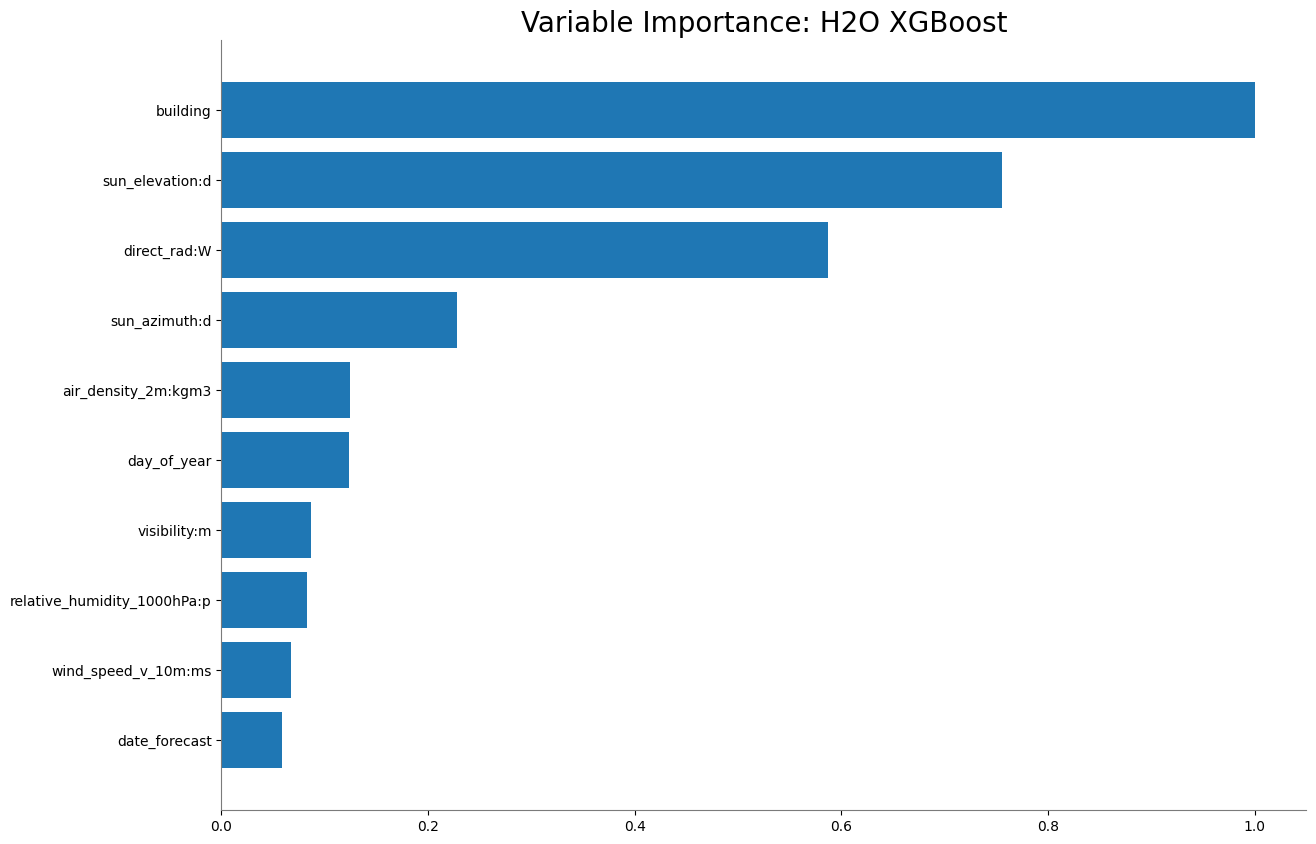

<Figure size 640x480 with 0 Axes>

In [27]:
best_xgb_model.varimp_plot()

In [22]:
# save the models
h2o.save_model(best_model, path = save_path, force=True, filename="02H_h2o_ensaemble_preprocessed_means_basic_feng_2")
h2o.save_model(best_xgb_model, path = save_path, force=True, filename="02H_h2o_xgboost_preprocessed_means_basic_feng_2")

'/home/henrikraa/models/02H_h2o_xgboost_preprocessed_means_basic_feng_2'